In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io

In [2]:
mat = scipy.io.loadmat('hw1_images.mat')

In [3]:
n_img = mat['noisy_image']
o_img = mat['original_image']

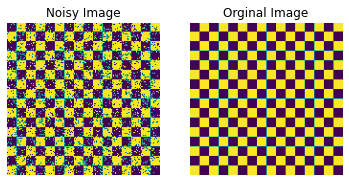

In [4]:
plt.subplot(121)
plt.imshow(n_img)
plt.title('Noisy Image')
plt.axis("off")
plt.subplot(122)
plt.imshow(o_img)
plt.title('Orginal Image')
plt.axis("off");

In [5]:
o_img_c = np.where(o_img == 0, -1, o_img)

In [6]:
y = n_img
x = y 

x = np.where(x == 0, -1, x)
y = np.where(y == 0, -1, y)

# Set parameters
alpha = 0.5 
beta = 1
ghama = 1 
 

In [7]:

def local_energy_f(i, j, x, y):
    energy =( alpha * x[i, j]) - (beta * x[i, j] * y[i, j])
    s = 0
    for k in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]:
        if k[0] >= 0 and k[0] <= n_img.shape[0]-1 and k[1] >= 0 and k[1] <= n_img.shape[0]-1:
            s += x[k]
    energy -= ghama * x[i, j] * s
    return energy



In [8]:
acc_list = []
mean_energies = []
for k in range(10):
    energy_m = []
    for i in range(n_img.shape[0]):
        for j in range(n_img.shape[0]):
            e1 = local_energy_f(i, j, x, y)
            x[i, j] = -x[i, j]
            e2 = local_energy_f(i, j, x, y)
            #print('k , e1 , e2 :',k,e1,e2 )
            if e1 < e2:
                x[i, j] = -x[i, j]
                min_e = e1
                energy_m.append(e1)
            else:
                min_e = e2
                energy_m.append(e2)

    true_pixles = (o_img_c == x).sum()

    acc = true_pixles*100/(n_img.shape[0]*n_img.shape[0])
    
    acc_list.append(acc)

    mean_energies.append(np.mean(energy_m))

    print('epoch : {}, enrgy : {}, acc :{}'.format(k,np.mean(energy_m),acc) )

epoch : 0, enrgy : -3.7166796875, acc :97.97265625
epoch : 1, enrgy : -4.023671875, acc :98.234375
epoch : 2, enrgy : -4.02734375, acc :98.2734375
epoch : 3, enrgy : -4.027734375, acc :98.28125
epoch : 4, enrgy : -4.027734375, acc :98.28125
epoch : 5, enrgy : -4.027734375, acc :98.28125
epoch : 6, enrgy : -4.027734375, acc :98.28125
epoch : 7, enrgy : -4.027734375, acc :98.28125
epoch : 8, enrgy : -4.027734375, acc :98.28125
epoch : 9, enrgy : -4.027734375, acc :98.28125


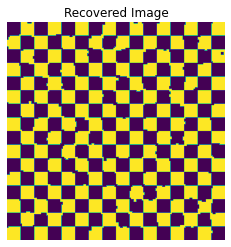

In [9]:
x[x==-1] = 0
plt.imshow(x)
plt.title('Recovered Image')
plt.axis("off");